In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [62]:
print(data.shape)

(7043, 20)


In [5]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [9]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
print("\nUnique Values per Column:\n", data.nunique())


Unique Values per Column:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


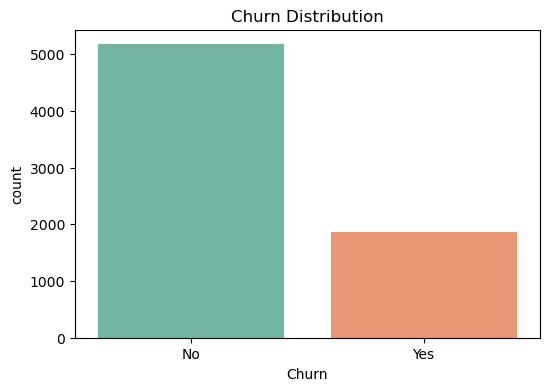

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=data, hue="Churn", palette="Set2")
plt.title("Churn Distribution")
plt.show()

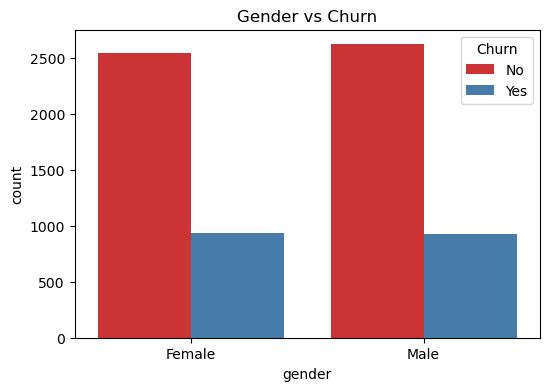

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=data, palette="Set1")
plt.title("Gender vs Churn")
plt.show()

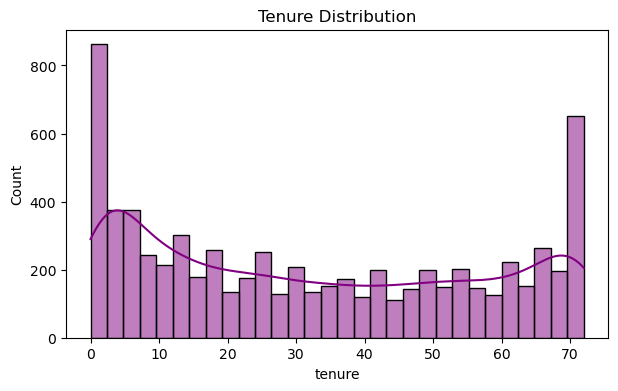

In [19]:
plt.figure(figsize=(7,4))
sns.histplot(data["tenure"], bins=30, kde=True, color="purple")
plt.title("Tenure Distribution")
plt.show()

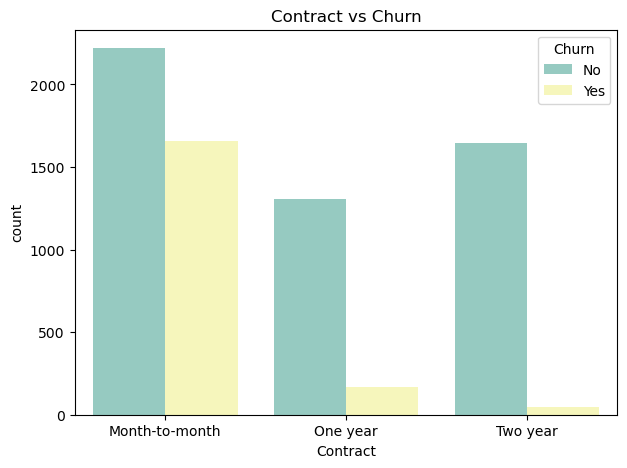

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x="Contract", hue="Churn", data=data, palette="Set3")
plt.title("Contract vs Churn")
plt.show()

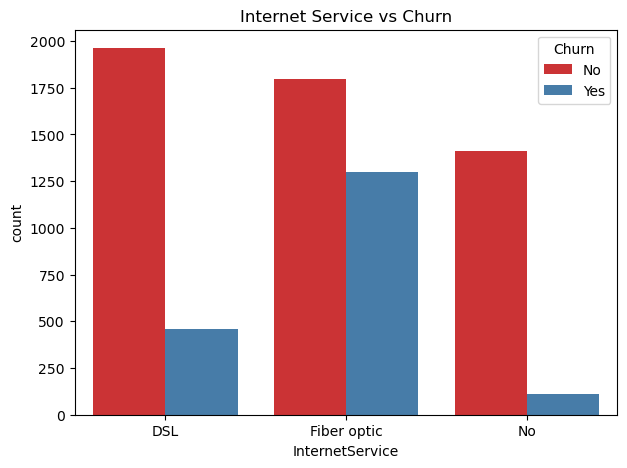

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(x="InternetService", hue="Churn", data=data, palette="Set1")
plt.title("Internet Service vs Churn")
plt.show()

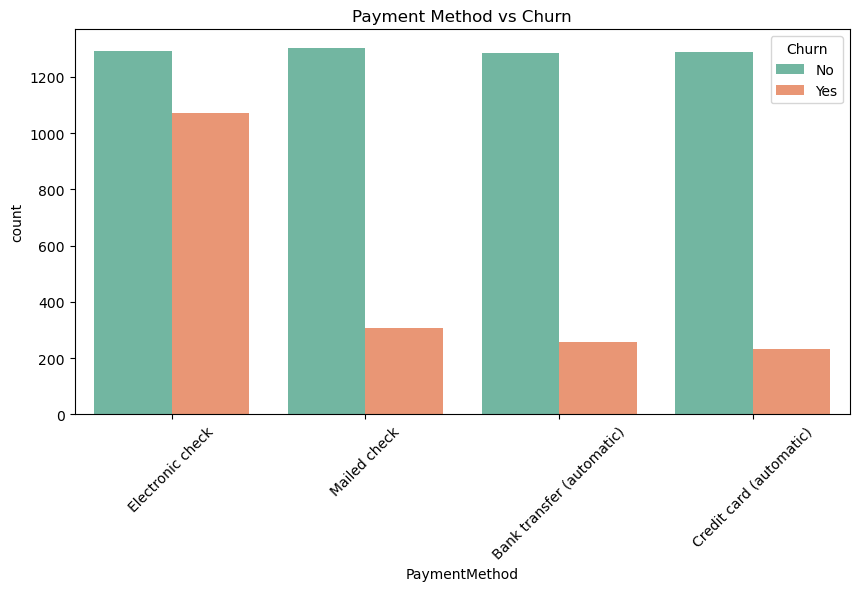

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=data, palette="Set2")
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()

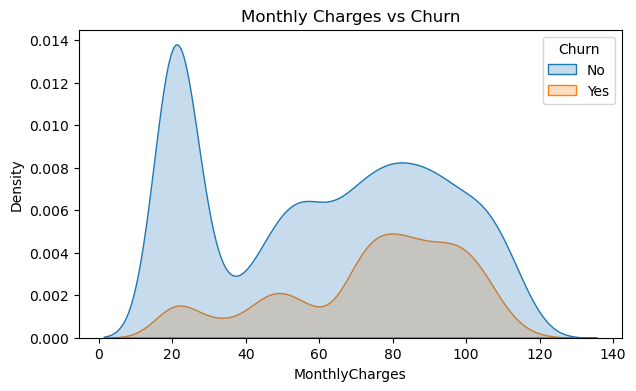

In [31]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges vs Churn")
plt.show()

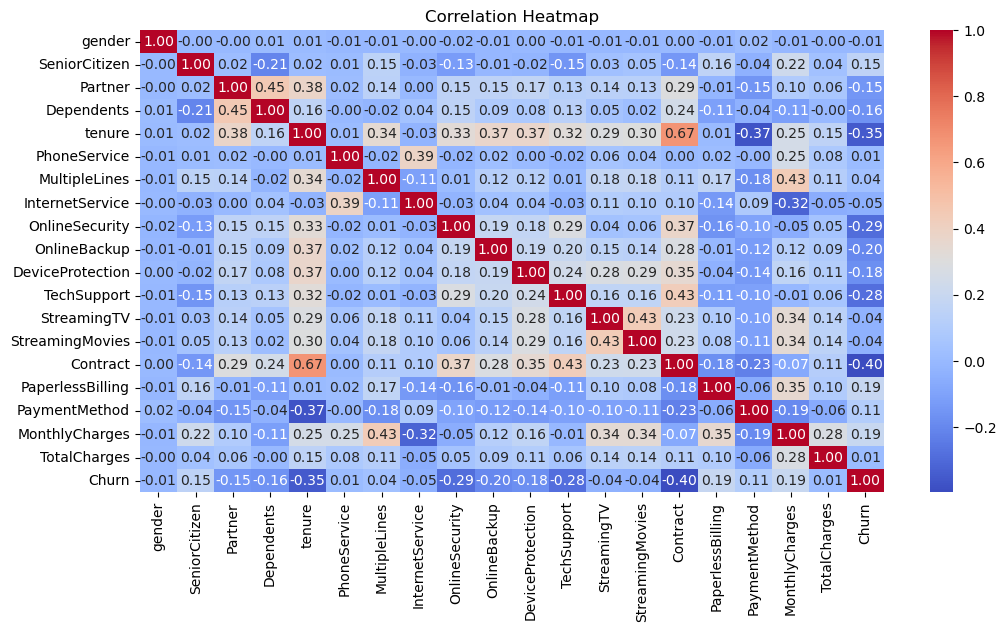

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [42]:
data = data.drop("customerID", axis=1)

In [43]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].replace(' ', np.nan)
        data[col] = data[col].fillna("Unknown")
        data[col] = pd.Categorical(data[col]).codes

In [44]:
X = data.drop("Churn", axis=1)
y = data["Churn"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Logistic Regression Results
Accuracy: 0.797
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



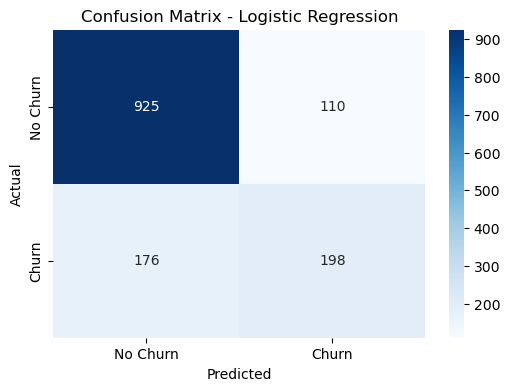

In [57]:
logistic_model = LogisticRegression(max_iter=5000, solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train)
y_pred_log = logistic_model.predict(X_test_scaled)

print("\n Logistic Regression Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_log), 
    annot=True, fmt='d', cmap="Blues", 
    xticklabels=['No Churn', 'Churn'], 
    yticklabels=['No Churn', 'Churn']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


 Random Forest Results
Accuracy: 0.7864
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



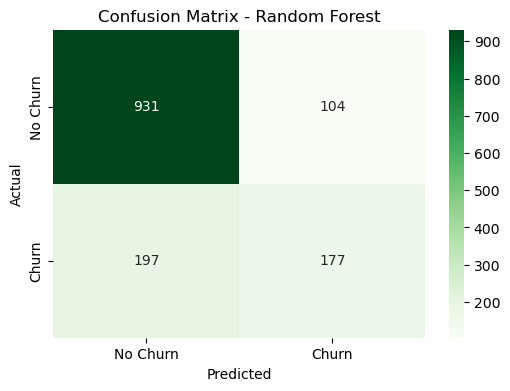

In [59]:
RandomForest_model = RandomForestClassifier(n_estimators=200, random_state=42)
RandomForest_model.fit(X_train, y_train)
y_pred_rf = RandomForest_model.predict(X_test)

print("\n Random Forest Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf), 
    annot=True, fmt='d', cmap="Greens", 
    xticklabels=['No Churn', 'Churn'], 
    yticklabels=['No Churn', 'Churn']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Random Forest")
plt.show()